# Project 3: Tidy Data

## Setting up IPython Notebook

Import pandas and matplotlib libraries in order to operate on and analyze data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
%matplotlib inline

In [2]:
pd.options.display.max_rows = 150

## First Data Set

### Opening the .csv File

For the first set of data, I used John's made-up heart drug test results, generated from a few lines of Python code. I used the pandas `.read_csv` function to open the file name by passing the filepath to it. The opened .csv file is stored in the `medications` object.

In [3]:
medications = pd.read_csv(r'/Users/Shared/Medications.csv')

Below we can see the .csv file headers to know the file was loaded properly.

In [4]:
medications.columns

Index([u'Subject', u'Gender', u'Control', u'Medication A', u'Medication B',
       u'Medication C', u'Medication D'],
      dtype='object')

### Convert the Data

Here we used the pandas "melt" function to change the data from "wide" to "long". By doing this, all of the medication types and heartrates are combined into their own columns.

In [5]:
meds = pd.melt(medications, id_vars=['Subject', 'Gender'], 
               value_vars=['Control', 'Medication A', 'Medication B', 'Medication C', 'Medication D'], 
               var_name= 'Medication', value_name='Heartrate')

In [6]:
type(meds)

pandas.core.frame.DataFrame

Below is our transformed DataFrame object:

In [7]:
meds

,Subject,Gender,Medication,Heartrate
0,1,Female,Control,82
1,2,Male,Control,85
2,3,Female,Control,75
3,4,Female,Control,72
4,5,Female,Control,67
5,6,Female,Control,72
6,7,Female,Control,74
7,8,Female,Control,69
8,9,Male,Control,74
9,10,Male,Control,78


### Selecting Data

Now we can use DataFrame commands to select certain parts of the data and operate on it.  Here we have selected all of the 'Control' group rows, and found the average heartrate.

In [8]:
control = meds.ix[0:19]['Heartrate']
control.mean()

75.8

In [9]:
meds.ix[0:19]['Heartrate'].mean()

75.8

### Plotting the Data

Here are all of the individual heartrates for each subject and medication, plotted out on a line graph.  Each set of 20 is the Control, Medication A, Medication B, and so on. You can already see by looking at each set of 20 points the range of each subjects heartrate from the different medications.

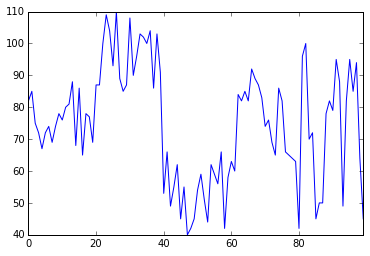

In [10]:
meds.ix[0:99]['Heartrate'].plot()

We can select a sub_group of the DataFrame, and plot those to break up each medication.

In [11]:
sub_group = meds.groupby('Medication')
sub_group['Heartrate'].mean()

Medication
Control         75.80
Medication A    96.70
Medication B    53.15
Medication C    75.85
Medication D    73.05
Name: Heartrate, dtype: float64

Medication
Control         Axes(0.125,0.125;0.775x0.775)
Medication A    Axes(0.125,0.125;0.775x0.775)
Medication B    Axes(0.125,0.125;0.775x0.775)
Medication C    Axes(0.125,0.125;0.775x0.775)
Medication D    Axes(0.125,0.125;0.775x0.775)
Name: Heartrate, dtype: object

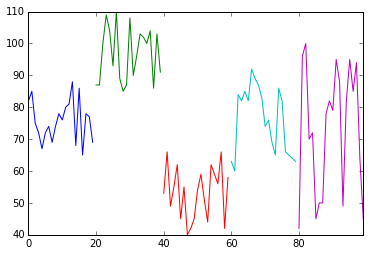

In [12]:
sub_group['Heartrate'].plot(x='Subject', y='Heartrate', subplots=True)

We can also group by subject and create individual bar graphs for each subject to see the result of each medication. This is basically each row of the DataFrame in a bar graph.

Subject
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
10    Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
12    Axes(0.125,0.125;0.775x0.775)
13    Axes(0.125,0.125;0.775x0.775)
14    Axes(0.125,0.125;0.775x0.775)
15    Axes(0.125,0.125;0.775x0.775)
16    Axes(0.125,0.125;0.775x0.775)
17    Axes(0.125,0.125;0.775x0.775)
18    Axes(0.125,0.125;0.775x0.775)
19    Axes(0.125,0.125;0.775x0.775)
20    Axes(0.125,0.125;0.775x0.775)
dtype: object

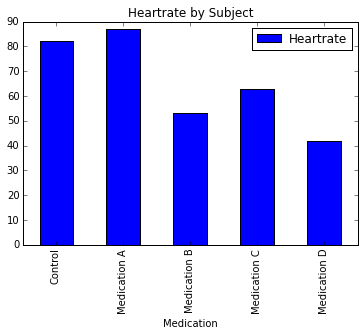

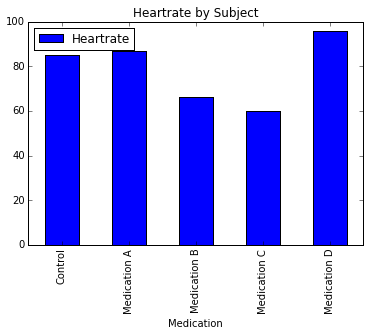

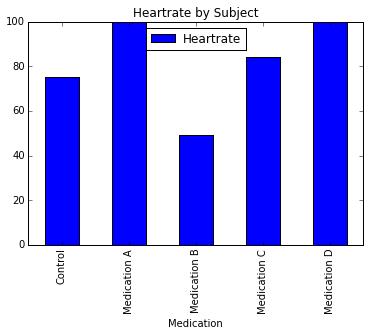

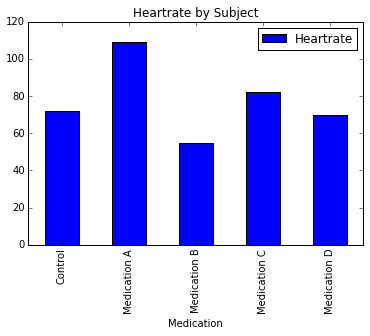

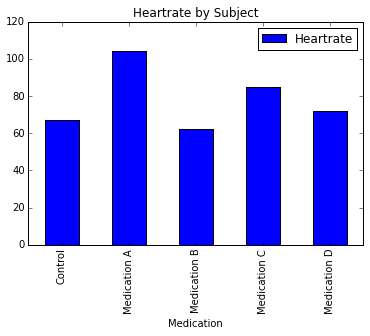

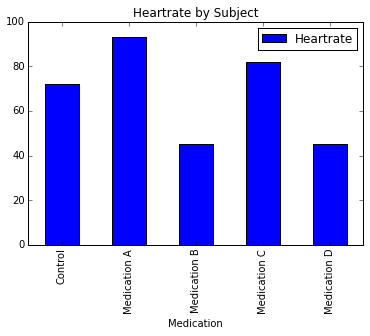

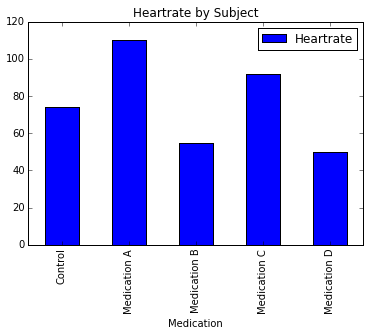

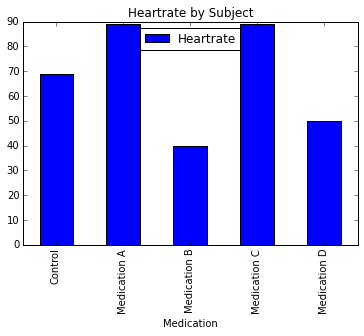

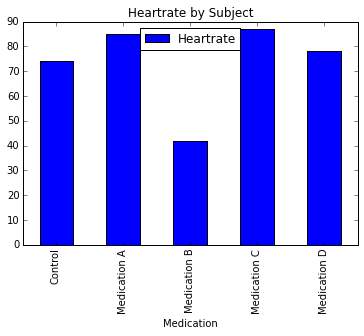

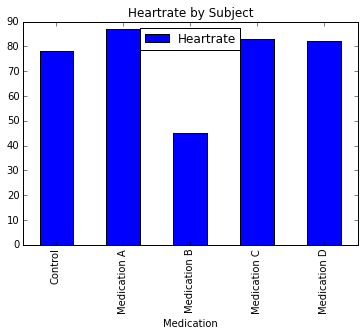

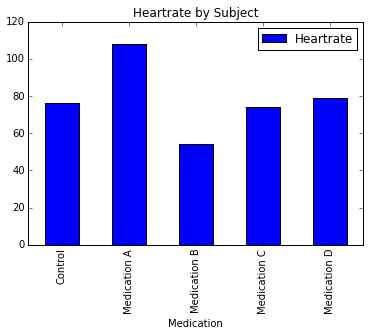

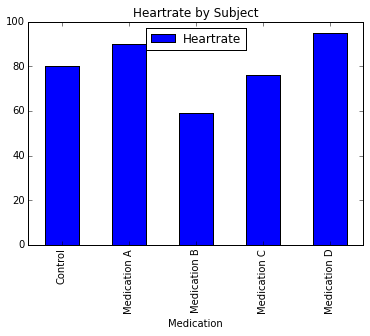

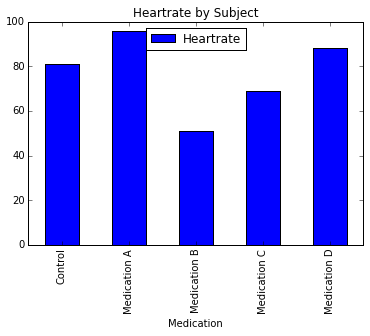

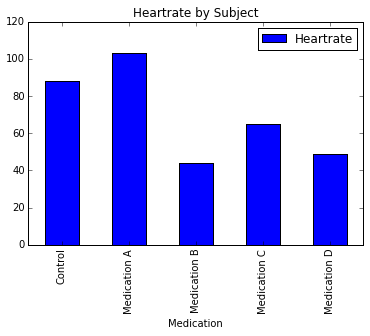

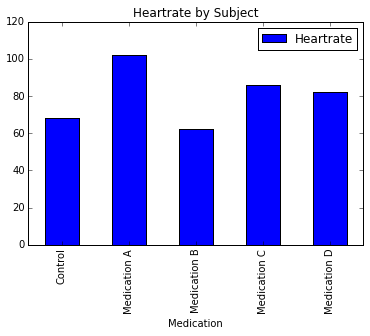

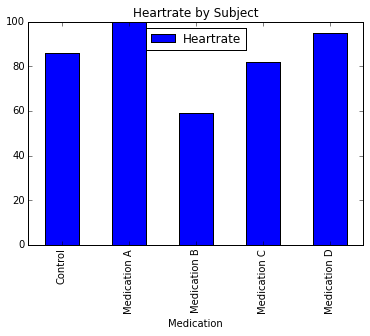

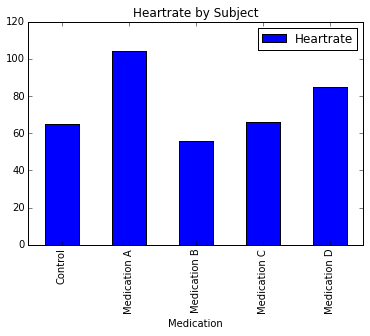

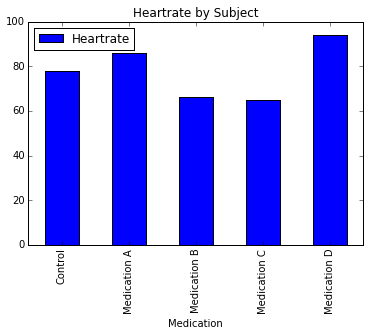

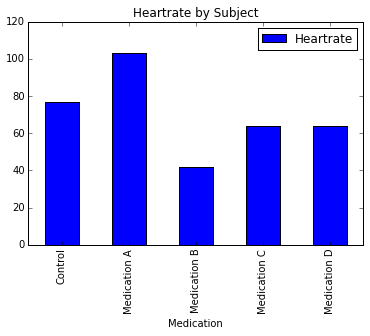

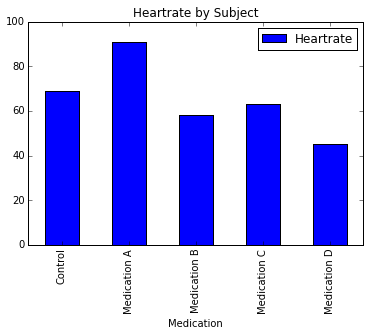

In [13]:
sub_group1 = meds.groupby('Subject')
sub_group1.plot(x='Medication', kind='bar', title = 'Heartrate by Subject')

By taking the mean of the 'Heartrate' column and plotting that, we can see the average heartrate from each medication for all subjects.  Now we can see that compared to the control, Medication A causes an increase in overall heartrate, and Medication B causes a decrease, while C and D stay relatively close to the Control Group.

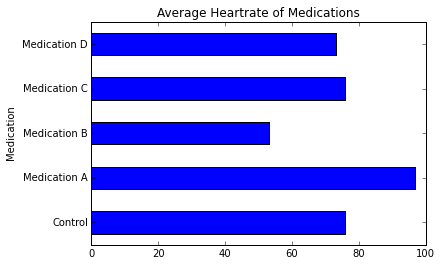

In [14]:
sub_group['Heartrate'].mean().plot(kind='barh', title='Average Heartrate of Medications')

## Second Data Set

For the second set of "untidy" data, I used Modesto's income-to-life-expectancy comparison.  I knew this would be similar to operating over John's data, but the slight difference in how the data was structured posed a different challenge.

### Creating the .csv File

In [56]:
US = ['', 41678, 79]
ukraine = ['', 16390, 68]
ethiopia = ['', 954, 63]
avg = ['', 19674, 70]

table = zip(US, ukraine, ethiopia, avg)

df = DataFrame(data=table, index=['Country', 'Income per Person', 'Life Expectancy'],
               columns=['United States', 'Ukraine', 'Ethiopia', 'Average'])
df

,United States,Ukraine,Ethiopia,Average
Country,,,,
Income per Person,41678,16390,954,19674
Life Expectancy,79,68,63,70


In [64]:
df.to_csv('LifeExpectancy_Income.csv', index=True, header=True)

### Opening the .csv File

Again, the same method as above is used to open the .csv file containing the data.

In [15]:
life_income = pd.read_csv(r'/Users/Shared/LifeExpectancy_Income.csv')

In [28]:
life_income

,United States,Ukraine,Ethiopia,Average
Country,,,,
Income per Person,41678,16390,954,19674
Life Expectancy,79,68,63,70


In [23]:
life_income = life_income.set_index('Country')

### Melt? Not quite...

I tried using the pandas 'melt' function to pivot the data, however this did not work quite the same way because of how the data was nested.

In [16]:
life = pd.melt(life_income, id_vars='Country', value_vars=['United States', 'Ukraine', 'Ethiopia', 'Average'])
life

,Country,variable,value
0,Income per Person,United States,41678
1,Life Expectancy,United States,79
2,Income per Person,Ukraine,16390
3,Life Expectancy,Ukraine,68
4,Income per Person,Ethiopia,954
5,Life Expectancy,Ethiopia,63
6,Income per Person,Average,19674
7,Life Expectancy,Average,70


### Transpose the Data

Instead, I used the transpose function to tidy up the data and transform it from "wide" to "long".

In [24]:
life2 = life_income.transpose()
life2

Country,Income per Person,Life Expectancy
United States,41678,79
Ukraine,16390,68
Ethiopia,954,63
Average,19674,70


Now that I have the data the way I want, I can plot it out to visualize the differences, or relationship in incomes and life expectancy for each country (and the average).

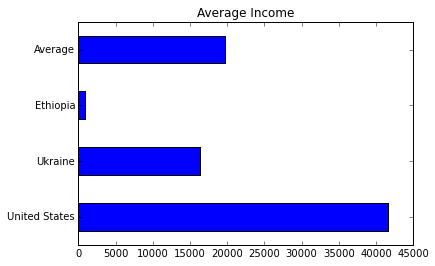

In [25]:
life2['Income per Person'].plot(kind='barh', title='Average Income')

In the above horizontal bar chart, we can see that the United States has a much larger Average Income compared to the other countries (about 44 times the amount for Ethiopia!).

### Income to Life Expectancy Relationship

Looking at the line graph, the relationship between income and life expectancy seems to correlate pretty well, so one would assume that more income generates a better quality of life, better healthcare, food, etc.

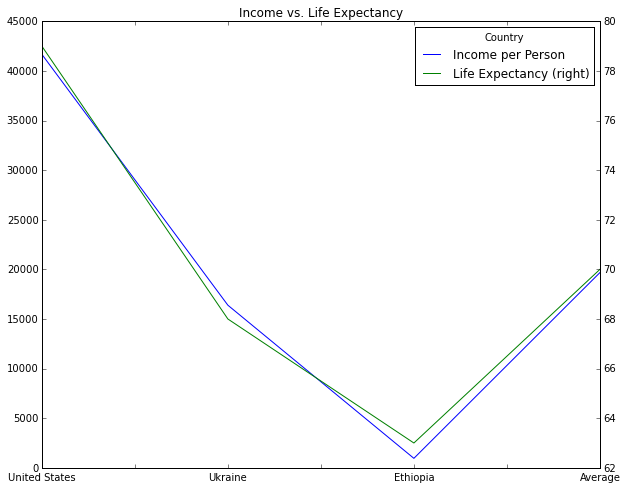

In [26]:
life2.plot(figsize=(10,8), secondary_y='Life Expectancy', title='Income vs. Life Expectancy')

### Not that drastic...

However, looking at the relationship in a bar graph, we can see that the difference income makes is not that drastic. Despite having a much higher average income, the life expectancy in the United States is not 44 times higher than in Ethiopia.

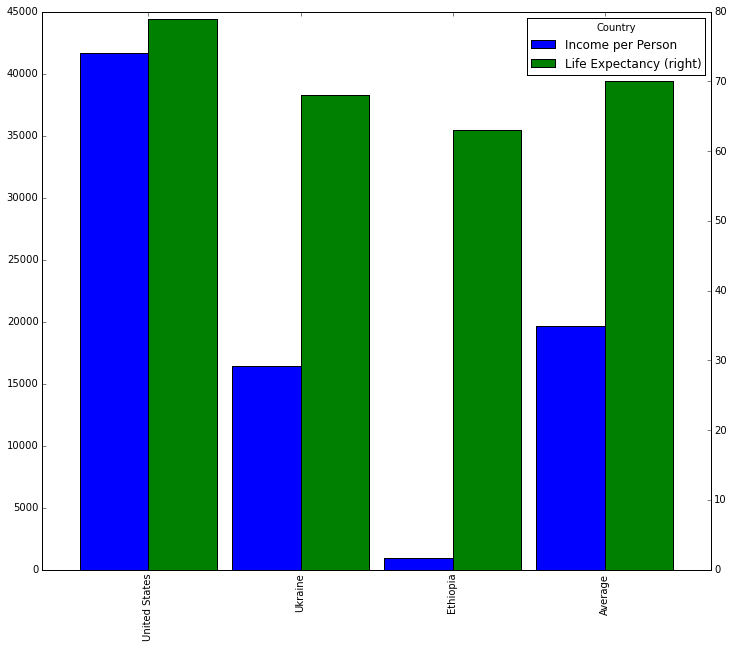

In [27]:
life2.plot(kind='bar', width=.9, figsize=(12, 10), secondary_y='Life Expectancy')